In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.special import binom

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from torch.autograd import Variable
import torch.utils.data as data_utils
import torch.nn.init as init

from collections import Counter
import operator
import copy
from itertools import product,combinations
from time import time
#from IPython.core.display import display

#%matplotlib inline

## code extracted from https://www.kaggle.com/code/graymant/breast-cancer-diagnosis-with-pytorch
## SV code extracted from https://github.com/mburaksayici/ExplainableAI-Pure-Numpy/blob/main/KernelSHAP-Pure-Numpy.ipynb

import yaml
import os
import shutil

# Combinatorial UCB
import math

In [2]:
import os 
experiments = ['MNIST_IFCL_1','MNIST_IFCL_2','MNIST_IFCL_3','MNIST_IFCL_4','MNIST_IFCL_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

local 100
mean:  99.3605076885526
std:  0.1475832702741608


In [3]:
import os
print('5')
experiments = ['BIH_IFCL_1_010','BIH_IFCL_2_010','BIH_IFCL_3_010','BIH_IFCL_4_010','BIH_IFCL_5_010']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

print('5')
experiments = ['BIH_IFCL_1_025','BIH_IFCL_2_025','BIH_IFCL_3_025','BIH_IFCL_4_025','BIH_IFCL_5_025']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

print('5')
experiments = ['BIH_IFCL_1_05','BIH_IFCL_2_05','BIH_IFCL_3_05','BIH_IFCL_4_05','BIH_IFCL_5_05']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['BIH_IFCL_1','BIH_IFCL_2','BIH_IFCL_3','BIH_IFCL_4','BIH_IFCL_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

5
local 10
mean:  39.807692631915714
std:  1.752137794883438
5
local 25
mean:  38.259108972840714
std:  3.6074997510040467
5
local 50
mean:  38.79828817574191
std:  1.2483442331395387
local 100
mean:  53.928405600855726
std:  6.36173610362499


In [4]:
import os
print('10')
experiments = ['BIH_IFCL_1_010_10','BIH_IFCL_2_010_10','BIH_IFCL_3_010_10','BIH_IFCL_4_010_10','BIH_IFCL_5_010_10']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

print('5')
experiments = ['BIH_IFCL_1_025_10','BIH_IFCL_2_025_10','BIH_IFCL_3_025_10','BIH_IFCL_4_025_10','BIH_IFCL_5_025_10']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

print('5')
experiments = ['BIH_IFCL_1_05_10','BIH_IFCL_2_05_10','BIH_IFCL_3_05_10','BIH_IFCL_4_05_10','BIH_IFCL_5_05_10']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['BIH_IFCL_1_10','BIH_IFCL_2_10','BIH_IFCL_3_10','BIH_IFCL_4_10','BIH_IFCL_5_10']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

10
local 10
mean:  37.36049714409319
std:  2.301842232928358
5
local 25
mean:  39.13407353845229
std:  2.861349249952125
5
local 50
mean:  39.3093443247819
std:  1.8222328787678894
local 100
mean:  59.29874636567185
std:  8.473420459572502


In [5]:
import os
print('20')
experiments = ['BIH_IFCL_1_010_20','BIH_IFCL_2_010_20','BIH_IFCL_3_010_20','BIH_IFCL_4_010_20','BIH_IFCL_5_010_20']
print('local 10')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

print('5')
experiments = ['BIH_IFCL_1_025_20','BIH_IFCL_2_025_20','BIH_IFCL_3_025_20','BIH_IFCL_4_025_20','BIH_IFCL_5_025_20']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

print('5')
experiments = ['BIH_IFCL_1_05_20','BIH_IFCL_2_05_20','BIH_IFCL_3_05_20','BIH_IFCL_4_05_20','BIH_IFCL_5_05_20']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

experiments = ['BIH_IFCL_1_20','BIH_IFCL_2_20','BIH_IFCL_3_20','BIH_IFCL_4_20','BIH_IFCL_5_20']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies)*100)
print('std: ',np.std(accuracies)*100)

20
local 10
mean:  38.98346789078511
std:  2.9586957773894293
5
local 25
mean:  38.70498749668862
std:  4.102937258083734
5
local 50
mean:  39.47766706186692
std:  1.6874293452251055
local 100
mean:  58.28754909324962
std:  8.842187543076323


In [82]:
import os
print('5')
experiments = ['MIT_IFCL_1_010','MIT_IFCL_2_010','MIT_IFCL_3_010','MIT_IFCL_4_010','MIT_IFCL_5_010']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_IFCL_1_025','MIT_IFCL_2_025','MIT_IFCL_3_025','MIT_IFCL_4_025','MIT_IFCL_5_025']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
experiments = ['MIT_IFCL_1_05','MIT_IFCL_2_05','MIT_IFCL_3_05','MIT_IFCL_4_05','MIT_IFCL_5_05']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_IFCL_1','MIT_IFCL_2','MIT_IFCL_3','MIT_IFCL_4','MIT_IFCL_5']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

5
local 25
mean:  52.49404559373937
std:  3.0941892067887555
local 25
mean:  55.95100374276965
std:  3.660868886394478
local 50
mean:  59.92514460700918
std:  3.2919355930623473
local 100
mean:  69.7107859816264
std:  2.307639690530805


In [91]:
import os
print('10')
experiments = ['MIT_IFCL_1_010_10','MIT_IFCL_2_010_10','MIT_IFCL_3_010_10','MIT_IFCL_4_010_10','MIT_IFCL_5_010_10']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_IFCL_1_025_10','MIT_IFCL_2_025_10','MIT_IFCL_3_025_10','MIT_IFCL_4_025_10','MIT_IFCL_5_025_10']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
experiments = ['MIT_IFCL_1_05_10','MIT_IFCL_2_05_10','MIT_IFCL_3_05_10','MIT_IFCL_4_05_10','MIT_IFCL_5_05_10']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_IFCL_1_10','MIT_IFCL_2_10','MIT_IFCL_3_10','MIT_IFCL_4_10','MIT_IFCL_5_10']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

10
local 25
mean:  51.03776794828172
std:  2.919590324616714
local 25
mean:  57.16910513780198
std:  4.215081097161855
local 50
mean:  62.39537257570602
std:  4.391405079120286
local 100
mean:  67.85981626403539
std:  3.221348948701304


In [93]:
import os
print('10')
experiments = ['MIT_IFCL_1_010_20','MIT_IFCL_2_010_20','MIT_IFCL_3_010_20','MIT_IFCL_4_010_20','MIT_IFCL_5_010_20']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_IFCL_1_025_20','MIT_IFCL_2_025_20','MIT_IFCL_3_025_20','MIT_IFCL_4_025_20','MIT_IFCL_5_025_20']
print('local 25')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))
experiments = ['MIT_IFCL_1_05_20','MIT_IFCL_2_05_20','MIT_IFCL_3_05_20','MIT_IFCL_4_05_20','MIT_IFCL_5_05_20']
print('local 50')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

experiments = ['MIT_IFCL_1_20','MIT_IFCL_2_20','MIT_IFCL_3_20','MIT_IFCL_4_20','MIT_IFCL_5_20']
print('local 100')
accuracies = []
for i,experiment in enumerate(experiments): 
    test_accuracy = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'test_accuracy.txt'))
  #  print(test_accuracy)
    accuracies.append(test_accuracy)
print('mean: ',np.mean(accuracies))
print('std: ',np.std(accuracies))

10
local 25
mean:  53.67131677441306
std:  3.137453585287943
local 25
mean:  57.597822388567536
std:  2.971346984380506
local 50
mean:  60.93909493024838
std:  3.9436928758858834
local 100
mean:  68.45185437223547
std:  1.828314408194172


In [4]:
def init():
    with open('settings/train_settings_bandits.yaml', 'r') as file:
        settings = yaml.safe_load(file)
    if not os.path.isdir('checkpoints_bandits'):
        os.mkdir('checkpoints_bandits')
    if not os.path.isdir(os.path.join('checkpoints_bandits', settings['experiment_name'])):
        os.mkdir(os.path.join('checkpoints_bandits', settings['experiment_name']))
    save_dir = os.path.join('checkpoints_bandits', settings['experiment_name'])
    if not os.path.isdir(os.path.join(save_dir, 'model')):
        os.mkdir(os.path.join(save_dir, 'model'))
    shutil.copyfile('settings/train_settings_bandits.yaml', save_dir + '/train_settings.yaml')
    return settings,save_dir

In [65]:
settings, save_dir = init()
print(settings)
from models import Net 
from data import FEMNIST_dataset, Partition_MNIST_NIID
from data import MNIST_NIID_dataset 
import tensorflow.keras as tk 
import random 

{'experiment_name': 'MNIST_test_IFCL', 'Date': '30_06_2023', 'Dataset': 'MNIST', 'n_clients': 100, 'n_clients_UCB': 1, 'seed': 42, 'n_classes_total': 4, 'n_classes_per_user': 2, 'data_fraction': 0.5, 'alpha': 0.75, 'network': 'Net', 'n_epochs': 100, 'local_iterations': 1, 'type': 'ifca', 'calc_accuracy': 'True', 'disp_loss': 'True', 'log_interval': 25, 'save_models': 'True'}


In [51]:
train_data, test_data = tk.datasets.mnist.load_data()
instance = Partition_MNIST_NIID(train_data[0], train_data[1])
classes_per_user = settings['n_classes_per_user']
total_clients = 100 
n_classes_total = settings['n_classes_total']
train_partition = instance.create_partition(n_classes_total, classes_per_user, total_clients)
test_instance = Partition_MNIST_NIID(test_data[0], test_data[1])
test_partition = test_instance.create_partition_test(instance.sample_array)

[[1 2]
 [0 1]
 [0 1]
 [3 1]
 [3 0]
 [0 1]
 [0 1]
 [3 2]
 [0 2]
 [3 1]
 [1 2]
 [0 1]
 [0 3]
 [0 2]
 [0 1]
 [1 3]
 [0 2]
 [1 3]
 [3 2]
 [1 3]
 [1 2]
 [1 3]
 [2 0]
 [3 2]
 [0 3]
 [2 0]
 [2 3]
 [3 2]
 [1 3]
 [2 3]
 [3 2]
 [3 2]
 [0 1]
 [1 2]
 [3 1]
 [1 3]
 [2 0]
 [3 2]
 [0 3]
 [3 1]
 [3 2]
 [0 1]
 [0 1]
 [3 2]
 [1 0]
 [1 0]
 [1 2]
 [1 3]
 [2 3]
 [2 1]
 [2 3]
 [0 1]
 [1 2]
 [1 3]
 [0 1]
 [2 3]
 [1 2]
 [3 1]
 [2 1]
 [2 0]
 [2 1]
 [0 3]
 [1 2]
 [1 0]
 [2 0]
 [0 3]
 [0 1]
 [0 1]
 [1 3]
 [0 2]
 [1 3]
 [2 0]
 [1 0]
 [2 3]
 [1 2]
 [2 3]
 [2 1]
 [2 1]
 [3 0]
 [0 1]
 [3 1]
 [3 0]
 [2 0]
 [2 3]
 [1 2]
 [3 0]
 [1 0]
 [3 0]
 [0 2]
 [1 3]
 [3 2]
 [1 2]
 [3 0]
 [0 1]
 [2 3]
 [3 0]
 [2 0]
 [1 0]
 [2 0]
 [0 1]]


In [52]:
 # split train dataset into train and val
print([len(x) for x in train_partition.values()])
fraction = 0.8
#print([int(np.floor(len(x)*0.8)) for x in train_partition.values()])
train_length = [int(np.floor(len(x)*0.8)) for x in train_partition.values()]

train_partition2 = {}
val_partition = {}

for key in train_partition.keys():
    og_length = len(train_partition[key])
    og_samples = np.array(train_partition[key])
    list1 = [x for x in range(og_length)]
    train_samples = np.random.choice(list1,size=int(np.floor(og_length*fraction)),replace=False)
    val_samples = [x for x in range(og_length) if x not in train_samples]
    train_partition2[key] = og_samples[train_samples]
    val_partition[key] = og_samples[val_samples]
print([len(x) for x in train_partition2.values()])
print([len(x) for x in val_partition.values()])

[243, 245, 245, 249, 250, 245, 245, 248, 244, 249, 243, 245, 250, 244, 245, 249, 244, 249, 248, 249, 243, 249, 244, 248, 250, 244, 248, 248, 249, 248, 248, 248, 245, 243, 249, 249, 244, 248, 250, 249, 248, 245, 245, 248, 245, 245, 243, 249, 248, 243, 248, 245, 243, 249, 245, 248, 243, 249, 243, 244, 243, 250, 243, 245, 244, 250, 245, 245, 249, 244, 249, 244, 245, 248, 243, 248, 243, 243, 250, 245, 249, 250, 244, 248, 243, 250, 245, 250, 244, 249, 248, 243, 250, 245, 248, 250, 244, 245, 244, 245]
[194, 196, 196, 199, 200, 196, 196, 198, 195, 199, 194, 196, 200, 195, 196, 199, 195, 199, 198, 199, 194, 199, 195, 198, 200, 195, 198, 198, 199, 198, 198, 198, 196, 194, 199, 199, 195, 198, 200, 199, 198, 196, 196, 198, 196, 196, 194, 199, 198, 194, 198, 196, 194, 199, 196, 198, 194, 199, 194, 195, 194, 200, 194, 196, 195, 200, 196, 196, 199, 195, 199, 195, 196, 198, 194, 198, 194, 194, 200, 196, 199, 200, 195, 198, 194, 200, 196, 200, 195, 199, 198, 194, 200, 196, 198, 200, 195, 196, 195, 196

In [15]:
import collections
from time import time
import random

seed = settings['seed']
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
test = 'local' #settings['type']
data_fraction = 1  # we're using all of the data 
print(test)
p2p = P2P_AFPL(total_clients, train_data, train_partition2, val_partition, test_data, test_partition,settings['n_clients_UCB'], settings['alpha'],test)
phis = p2p.loop(settings['n_epochs'], p2p, settings['experiment_name'])


local
0


/mimer/NOBACKUP/groups/naiss2023-22-980/arthur/code/Federated_Averaging/models/FEMNIST_model.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


full train loss:  tensor(0.0171, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0221, device='cuda:0', dtype=torch.float64)
we are done
val accuracy:  98.76792567158151
test accuracy:  99.20462762111352
0
accuracy is best accuracy
[99.4059405940594, 99.6923076923077, 99.6923076923077, 99.7584541062802, 99.51807228915662, 99.6923076923077, 100.0, 97.47899159663865, 98.41897233201581, 99.7584541062802]
1
full train loss:  tensor(0.0109, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0163, device='cuda:0', dtype=torch.float64)
we are done
val accuracy:  99.07089476873358
test accuracy:  99.44564955410942
98.76792567158151
accuracy is best accuracy
[99.60396039603961, 99.6923076923077, 99.6923076923077, 99.7584541062802, 99.51807228915662, 99.6923076923077, 100.0, 98.82352941176471, 98.41897233201581, 100.0]
2
full train loss:  tensor(0.0059, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0141, device='cuda:0', dtype=torch.float64)
we are done
val accura

test accuracy:  99.92769342010122
32
full train loss:  tensor(3.1618e-06, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0355, device='cuda:0', dtype=torch.float64)
we are done
val accuracy:  99.67683296303777
test accuracy:  99.92769342010122
33
full train loss:  tensor(4.6766e-06, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0352, device='cuda:0', dtype=torch.float64)
we are done
val accuracy:  99.63643708341749
test accuracy:  99.92769342010122
34
full train loss:  tensor(2.0160e-06, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0354, device='cuda:0', dtype=torch.float64)
we are done
val accuracy:  99.65663502322764
test accuracy:  99.92769342010122
35
full train loss:  tensor(7.6000e-08, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0347, device='cuda:0', dtype=torch.float64)
we are done
val accuracy:  99.6970309028479
test accuracy:  99.92769342010122
36
full train loss:  tensor(6.7618e-08, device='cuda:0', dtype=torch.float64)
f

KeyboardInterrupt: 

In [67]:
class IFCA():
    def __init__(self ,total_clients ,train_data ,train_partition ,val_partition ,test_data ,test_partition,n_clients_selected
                 ,alpha = 0.25, test='AFPL'):
        self.network = Net('MNIST_niid')
        self.total_clients = total_clients
        self.client_models = {}
        self.optimizers = {}
        self.dataloaders = {}
        self.len = {}
        self.len_test = {}
        self.len_really_test = {}
        self.dataloaders_test = {}
        self.dataloaders_really_test = {}
        self.best_test_loss = {}
        self.best_test_loss_global = 1000000
        self.current_test_loss = {}
        self.current_train_loss = {}
        self.test = test
       

        for i in range(total_clients):
            self.client_models[str(i)] = copy.deepcopy(self.network).double().cuda()
            self.optimizers[str(i)] = torch.optim.SGD(self.client_models[str(i)].parameters() ,lr=0.008 ,momentum=0.5)
            if data_fraction != 1:
                dataset_train= MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,train_partition ,i)
            else:
                dataset_train = MNIST_NIID_dataset(train_data[0], train_data[1], train_partition, i)

            if i == 1:
                if data_fraction != 1:
                    dataset = torch.utils.data.ConcatDataset([dataset_train,MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,train_partition,i )])
                else:
                    dataset = torch.utils.data.ConcatDataset(
                        [dataset_train, MNIST_NIID_dataset(train_data[0], train_data[1], train_partition, i)])
            if i > 1 :
                if data_fraction != 1:
                    dataset = torch.utils.data.ConcatDataset(
                    [dataset,MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,train_partition,i )])
                else:
                    dataset = torch.utils.data.ConcatDataset(
                        [dataset, MNIST_NIID_dataset(train_data[0], train_data[1], train_partition, i)])


            self.len[str(i) ]= len(dataset_train)
            self.dataloaders[str(i)] = DataLoader(dataset_train ,batch_size=16 ,shuffle=True)
            if data_fraction !=1:
                dataset_test= MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,val_partition,i  )
            else:
                dataset_test = MNIST_NIID_dataset(train_data[0], train_data[1], val_partition, i)

            dataset_really_test = MNIST_NIID_dataset(test_data[0],test_data[1],test_partition,i)
            self.len_really_test[str(i)] = len(dataset_really_test)
            self.dataloaders_really_test[str(i)] = DataLoader(dataset_really_test,batch_size=16,shuffle=True)
            self.len_test[str(i)] = len(dataset_test)
            self.dataloaders_test[str(i)] = DataLoader(dataset_test ,batch_size=16 ,shuffle=False)
            self.best_test_loss[str(i)] = 10000000
            self.current_test_loss[str(i)] = 100000
            self.current_train_loss[str(i)] = 1000000
          
        self.dataset_train = dataset_train
        self.dataloader_centralized = DataLoader(dataset, batch_size=32, shuffle=True)
        
    def init_ifca(self, k): 
        # setup models 
        self.global_models_ifca = {}
        for i in range(k):
            self.global_models_ifca[str(i)] = copy.deepcopy(self.network).double().cuda()

        # initialize cluster assignment to be random 
        self.cluster_assign = np.random.randint(0, k, size=self.total_clients)
    
    def run_ifca(self, selected_clients): 
        
        for idx, i in enumerate(selected_clients): 
            # find current cluster assignment 
            k_i = self.cluster_assign[i]
            # extract the appropriate model 
            model = copy.deepcopy(self.global_models_ifca[str(k_i)])
            dataloader = self.dataloaders[str(i)]
            optimizer = torch.optim.Adam(model.parameters() ,lr=0.001 *0.95**self.iteration)
            # perform local training 
            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.double().cuda()
                target =target.long().cuda()

                optimizer.zero_grad()
                output = model(data)
                loss = F.nll_loss(output ,target)
                loss.backward()
                optimizer.step()
            
            # save the trained model at the client side 
            self.client_models[str(i)] = copy.deepcopy(model)
            
    def cluster_ifca(self, selected_clients, k): 
        
        losses = np.zeros((len(selected_clients),k))
        for idx, i in enumerate(selected_clients): 
            dataloader = self.dataloaders[str(i)]
            for batch_idx, (data, target) in enumerate(dataloader):
                for k_i in range(k): 
                    data = data.double().cuda()
                    target =target.long().cuda()
                    output = self.global_models_ifca[str(k_i)](data)
                    loss = F.nll_loss(output ,target)
                    losses[idx,k_i] += loss 
                    
        #print(losses)
        print(np.min(losses,axis=1))
        self.cluster_assign = np.argmin(losses,axis=1)
        
    def combine_ifca(self, selected_clients, k):
        print(self.cluster_assign)
        for k_i in range(k): 
            clients_in_ki = [i for i in selected_clients if self.cluster_assign[i] == k_i]
            
            if len(clients_in_ki) > 0: 
                # do this only if there's at least once client per thing 
                shared_model = copy.deepcopy(self.global_models_ifca[str(k_i)]).double().cuda()
                n_clients = len(clients_in_ki)
                weight = [1/n_clients for x in range(n_clients)]

                for idx, i in enumerate(clients_in_ki):
                    for (name, param), (name2, param2) in zip(shared_model.named_parameters()
                            , self.client_models[str(i)].named_parameters()):
                        if idx == 0:
                            param.data = torch.zeros(param.shape).cuda().double()
                        param.data += weight[idx] * param2.data

                self.global_models_ifca[str(k_i)] = shared_model.double().eval()

    def update_local_models(self ,selected_clients):
        self.dw = {}
        loss_test = 0
        loss_test2 = 0
        losses = 0
        losses2 = 0
        loss_test3 = 0
        losses3 = 0

        for idx ,i in enumerate(selected_clients):
            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target =target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test += F.nll_loss(output ,target)
                self.current_test_loss[str(i)] = loss_test /self.len_test[str(i)]
                if self.current_test_loss[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model ' +str(i ) +'.pt'))
                    self.best_test_loss[str(i)] = self.current_test_loss[str(i)]

            losses += loss_test /self.len_test[str(i)]
            loss_test2 = 0
            self.client_models[str(i)].eval()
            dataloader = self.dataloaders[str(i)]
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader):
                    data = data.double().cuda()
                    target = target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test2 += F.nll_loss(output, target)

            losses2 += loss_test2 / self.len[str(i)]
            self.current_train_loss[str(i)] = loss_test2 / self.len[str(i)]

        print('full train loss: ', losses2)
        print('full loss: ', losses)

        return losses2, losses


    
    def calc_accuracy(self, dataloader, length):
        accuracies = np.zeros(len(self.selected_clients))
        total = 0
        self.accuracy_list = []
        for i in self.selected_clients:
            intermediate_accuracy = 0

            for batch_idx, (data, target) in enumerate(dataloader[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array, axis=-1)
                target_array = target.detach().cpu().numpy()
                intermediate_accuracy += np.sum(output_class == target_array)
            accuracy = intermediate_accuracy / length[str(i)]* 100
            total += length[str(i)]

            self.accuracy_list.append(accuracy)
            accuracies[i] = intermediate_accuracy
        overall_accuracy = np.sum(accuracies) / total * 100
        return overall_accuracy

    def loop(self, epochs, experiment_name, k):

        loss_tests = []
        loss_trains = []
        loss_tests2 = []
        loss_trains2 = []
        accuracies = []
        accuracies_train = []
        best_accuracy = 0

        self.selected_clients_arr = np.zeros((epochs, self.total_clients, self.total_clients))
        self.init_ifca(k)

        for i in range(epochs):
            print(i)
            list1 = []
            self.selected_clients = [x for x in range(self.total_clients)]
            self.iteration = i
            if i != 0: 
                self.cluster_ifca(self.selected_clients,k)
            self.run_ifca(self.selected_clients)
            self.combine_ifca(self.selected_clients,k)

            loss_train, loss_test = self.update_local_models(self.selected_clients)
            
            loss_tests.append(loss_test.detach().cpu().numpy())
            loss_trains.append(loss_train.detach().cpu().numpy())
            
            accuracy_val = self.calc_accuracy(self.dataloaders_test, self.len_test)
            print('val accuracy: ', accuracy_val)

            accuracy = self.calc_accuracy(self.dataloaders_really_test, self.len_really_test)
            print('test accuracy: ', accuracy)
            accuracies.append(accuracy)
            if accuracy_val > best_accuracy:
                print(best_accuracy)
                print('accuracy is best accuracy')
                print(self.accuracy_list)
                best_accuracy = accuracy_val

                # save all of this in a .txt file
                fname = os.path.join('checkpoints_bandits', experiment_name, 'test_accuracies.txt')
                np.savetxt(fname, self.accuracy_list)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'test_accuracy.txt')
                np.savetxt(fname, [accuracy])


        # print(self.phis)
        fname = os.path.join('checkpoints_bandits', experiment_name, 'accuracies.txt')
        np.savetxt(fname, accuracies)

        plt.figure()
        plt.plot(loss_trains, label='train loss before')
        plt.plot(loss_tests, label='test loss before')
        plt.plot(loss_trains2, label='train loss after')
        plt.plot(loss_tests2, label='test loss after')
        plt.title('loss curve')
        plt.legend(loc="upper right")
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'loss_curve.png'))
        plt.clf()
        plt.plot(accuracies, label='test')
        plt.plot(accuracies_train, label='train')
        plt.title('accuracy progression')
        plt.legend()
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'accuracy_progression.png'))





MNIST_test_IFCL
0
[3 4 2 4 4 1 2 2 2 4 3 2 5 4 1 3 5 5 1 3 4 0 3 1 5 4 3 0 0 2 2 1 3 3 5 5 5
 2 3 3 0 2 4 2 4 0 1 3 0 3 5 1 1 0 1 4 1 3 3 3 3 4 2 5 0 3 1 3 1 5 5 5 1 3
 5 4 1 1 3 1 1 5 3 5 5 3 0 5 4 4 1 4 1 0 3 3 3 4 0 4]
full train loss:  tensor(2.9837, device='cuda:0', dtype=torch.float64)
full loss:  tensor(3.7401, device='cuda:0', dtype=torch.float64)
val accuracy:  86.37833468067906
test accuracy:  87.42982670246522
0
accuracy is best accuracy
[95.1219512195122, 100.0, 100.0, 80.48780487804879, 51.21951219512195, 100.0, 100.0, 88.09523809523809, 87.8048780487805, 92.6829268292683, 95.1219512195122, 100.0, 70.73170731707317, 97.5609756097561, 100.0, 87.8048780487805, 90.2439024390244, 92.6829268292683, 83.33333333333334, 82.92682926829268, 100.0, 75.60975609756098, 90.2439024390244, 50.0, 97.5609756097561, 100.0, 92.85714285714286, 50.0, 70.73170731707317, 73.80952380952381, 61.904761904761905, 50.0, 100.0, 87.8048780487805, 87.8048780487805, 95.1219512195122, 60.97560975609756, 50

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.9197, device='cuda:0', dtype=torch.float64)
full loss:  tensor(1.1264, device='cuda:0', dtype=torch.float64)
val accuracy:  95.27081649151172
test accuracy:  95.58213326824506
94.52303961196444
accuracy is best accuracy
[97.5609756097561, 100.0, 95.0, 95.1219512195122, 97.5609756097561, 100.0, 100.0, 90.47619047619048, 92.6829268292683, 95.1219512195122, 100.0, 100.0, 100.0, 95.1219512195122, 100.0, 95.1219512195122, 100.0, 100.0, 90.47619047619048, 90.2439024390244, 100.0, 100.0, 97.5609756097561, 95.23809523809523, 97.5609756097561, 92.6829268292683, 90.47619047619048, 95.23809523809523, 97.5609756097561, 83.33333333333334, 88.09523809523809, 85.71428571428571, 100.0, 95.1219512195122, 95.1219512195122, 100.0, 90.2439024390244, 92.85714285714286, 100.0, 97.

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.3182, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.5159, device='cuda:0', dtype=torch.float64)
val accuracy:  97.67582861762328
test accuracy:  97.99853551379057
96.86742118027486
accuracy is best accuracy
[97.5609756097561, 100.0, 100.0, 97.5609756097561, 97.5609756097561, 100.0, 100.0, 92.85714285714286, 100.0, 97.5609756097561, 100.0, 100.0, 100.0, 97.5609756097561, 100.0, 100.0, 95.1219512195122, 100.0, 97.61904761904762, 95.1219512195122, 97.5609756097561, 100.0, 95.1219512195122, 92.85714285714286, 97.5609756097561, 95.1219512195122, 97.61904761904762, 97.61904761904762, 95.1219512195122, 97.61904761904762, 90.47619047619048, 92.85714285714286, 100.0, 95.1219512195122, 100.0, 100.0, 92.6829268292683, 95.23809523809523, 100.0, 95.1219512195

full train loss:  tensor(0.2261, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.4664, device='cuda:0', dtype=torch.float64)
val accuracy:  97.97898140662895
test accuracy:  98.2182084452038
10
[6.91699806e-01 1.92603363e-05 7.12483900e-01 3.89410166e-01
 1.88940683e-01 1.30634034e-03 9.90496253e-02 2.95125952e+00
 2.50485551e+00 5.10782916e-01 5.98498101e-01 1.16843701e-03
 1.25128760e-01 2.98633553e+00 6.99820353e-04 6.52577978e-01
 4.16061557e+00 4.66813297e-01 3.40895931e+00 7.50939627e-02
 7.46070589e-02 1.24822480e+00 2.86731475e+00 4.13317728e+00
 4.23158650e-01 3.81363118e+00 2.21930356e+00 2.27419834e+00
 6.70047082e-02 2.15701324e+00 3.22155736e+00 2.11220705e+00
 4.68838636e-06 2.62404385e-01 4.80136608e-01 7.20223025e-01
 2.66392782e+00 2.12955635e+00 1.30302671e-01 3.95846971e-01
 4.52610886e+00 2.03293819e-05 1.93305321e-06 4.33933442e+00
 2.86039943e-03 6.47579522e-01 1.72864459e-02 3.73598782e-01
 3.14552936e+00 4.07846984e+00 3.76629181e+00 5.32065733e-02
 1

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1781, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3708, device='cuda:0', dtype=torch.float64)
val accuracy:  98.38318512530316
test accuracy:  98.48669758359776
14
[5.60370432e-01 3.25496614e-07 6.92481215e-01 3.62084168e-01
 1.13605577e-01 1.12767807e-03 1.72819789e-01 1.96796186e+00
 1.26529095e+00 3.89733618e-01 6.14564093e-01 3.08440617e-05
 2.18252749e-01 2.18022907e+00 5.60976575e-06 5.55052419e-01
 2.47696426e+00 3.78580331e-01 2.06937634e+00 3.18894379e-02
 7.65112889e-02 8.54617215e-01 1.34361091e+00 2.45739554e+00
 4.83798691e-01 2.50089637e+00 1.28005951e+00 1.33949873e+00
 3.41217360e-02 8.82965564e-01 1.34301642e+00 1.30769682e+00
 3.35995708e-07 1.89072371e-01 5.19362294e-01 6.01269338e-01
 1.70211097e+00 1.02882555e+00 7.11979591

full train loss:  tensor(0.1565, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3445, device='cuda:0', dtype=torch.float64)
val accuracy:  98.4842360549717
test accuracy:  98.63314620453991
17
[9.52172090e-01 7.73276983e-08 6.62499339e-01 3.54332450e-01
 8.34814694e-02 1.08524285e-03 1.98637449e-01 1.56161863e+00
 8.29403338e-01 3.47883597e-01 6.73105288e-01 7.46195605e-06
 2.90662689e-01 1.29693379e+00 1.39808360e-06 5.57532893e-01
 1.57454289e+00 3.47078186e-01 1.86200324e+00 1.56644893e-02
 8.93491591e-02 9.43524128e-01 9.24860458e-01 2.19962041e+00
 5.22106644e-01 1.99794826e+00 1.10301587e+00 2.20793582e+00
 2.27821873e-02 7.47697307e-01 1.31001912e+00 1.09329779e+00
 2.10933228e-07 1.60231315e-01 5.05617663e-01 5.83908881e-01
 1.08232037e+00 7.09691087e-01 8.35253573e-02 3.33055889e-01
 3.06167503e+00 7.33828035e-06 5.49688138e-08 2.38950183e+00
 6.38790649e-03 5.52962962e-01 9.00587087e-03 2.03359619e-01
 1.33913696e+00 5.50897122e+00 2.58137859e+00 3.59317173e-02
 1

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1349, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3369, device='cuda:0', dtype=torch.float64)
val accuracy:  98.60549717057397
test accuracy:  98.77959482548206
21
[4.64860147e-01 5.83134977e-08 7.19365008e-01 3.26779401e-01
 1.89497905e-01 2.22791130e-04 1.21154990e-01 1.23311689e+00
 7.62006204e-01 3.34488719e-01 6.88802952e-01 2.51000047e-06
 1.71239650e-01 1.33367784e+00 5.65394449e-07 5.58590012e-01
 1.44047199e+00 4.24543189e-01 1.68899787e+00 8.63299388e-03
 7.19467648e-02 1.27748604e+00 9.04252087e-01 1.57590988e+00
 4.62566944e-01 2.00812019e+00 8.32313290e-01 1.85726594e+00
 2.22490884e-02 4.52420958e-01 8.86811396e-01 8.17954944e-01
 7.55363524e-08 1.27672537e-01 4.24387544e-01 6.19147876e-01
 1.09816314e+00 3.78761426e-01 5.51022542

[4.04870017e-01 5.69553390e-08 7.64636030e-01 3.92905366e-01
 9.22886440e-02 5.78682476e-05 6.89881551e-02 8.86464828e-01
 5.83234719e-01 4.92361493e-01 7.03799659e-01 2.05992632e-06
 3.00764027e-01 1.05098394e+00 7.60987744e-07 5.93333232e-01
 1.37512414e+00 3.06149903e-01 1.20407893e+00 6.48394420e-03
 5.02898765e-02 7.55514115e-01 7.20240180e-01 1.32151669e+00
 5.17113235e-01 1.69302591e+00 6.17166714e-01 8.09661368e-01
 1.04144881e-02 3.62447025e-01 6.84555946e-01 6.20172822e-01
 3.46151965e-08 1.23671630e-01 5.75444922e-01 5.22545954e-01
 9.97360830e-01 3.17998716e-01 2.55333677e-02 3.89137620e-01
 1.76800570e+00 7.17637778e-07 1.03050264e-09 1.34971932e+00
 1.01591562e-04 4.20348333e-01 2.35723649e-03 1.27882414e-01
 6.17794921e-01 1.34934119e+00 1.49968945e+00 2.12418036e-03
 1.56620679e+00 3.96172328e-02 7.58009187e-01 1.22974113e+00
 4.94552454e-01 1.27887613e-03 1.01506652e+00 8.88951889e-01
 1.78064719e-03 8.46216062e-02 2.15792624e-02 3.00669238e-08
 5.27636135e-01 1.317120

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1246, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2932, device='cuda:0', dtype=torch.float64)
val accuracy:  98.78738884397737
test accuracy:  98.92604344642422
29
[4.14798912e-01 3.02634083e-08 7.53698702e-01 3.90357320e-01
 5.24284554e-02 3.78317946e-05 6.76928996e-02 7.73041009e-01
 5.56476770e-01 2.50365770e-01 7.81510922e-01 1.09936879e-06
 3.66623219e-01 1.01905248e+00 2.19118229e-07 6.08666222e-01
 1.01037111e+00 3.28993318e-01 1.12440105e+00 3.80562651e-03
 6.27678294e-02 8.12919094e-01 6.21418820e-01 1.20906029e+00
 5.61931634e-01 1.61145235e+00 5.06902968e-01 8.60480534e-01
 8.34870427e-03 3.20783281e-01 5.95080383e-01 4.70761586e-01
 3.20616514e-08 9.50180077e-02 5.64496845e-01 5.10530856e-01
 8.12890578e-01 2.64284446e-01 2.87988413

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1352, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2621, device='cuda:0', dtype=torch.float64)
val accuracy:  98.92886014551334
test accuracy:  99.09690017085673
98.82780921584478
accuracy is best accuracy
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 95.23809523809523, 100.0, 100.0, 97.5609756097561, 100.0, 97.5609756097561, 97.5609756097561, 100.0, 97.5609756097561, 100.0, 100.0, 97.61904761904762, 97.5609756097561, 100.0, 100.0, 95.1219512195122, 97.61904761904762, 100.0, 97.5609756097561, 97.61904761904762, 100.0, 100.0, 100.0, 97.61904761904762, 97.61904761904762, 100.0, 97.5609756097561, 100.0, 100.0, 97.5609756097561, 95.23809523809523, 100.0, 100.0, 92.85714285714286, 100.0, 100.0, 95.23809523809523, 100.0, 100.0, 100.0, 100.0, 100.0

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1295, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2893, device='cuda:0', dtype=torch.float64)
val accuracy:  98.90864995957963
test accuracy:  99.14571637783745
38
[3.23830008e-01 2.95785042e-08 7.77983304e-01 3.96020407e-01
 4.78081232e-02 1.03822877e-05 2.68375479e-02 6.48377053e-01
 3.77027245e-01 3.00383095e-01 8.08575787e-01 9.93041949e-07
 3.84666536e-01 8.82765504e-01 1.25332834e-07 6.37595515e-01
 7.84882666e-01 3.86730283e-01 1.00199885e+00 1.61726155e-03
 2.46517400e-02 1.01453322e+00 4.91484420e-01 1.15131773e+00
 5.59469374e-01 1.51899321e+00 4.27145034e-01 7.41129215e-01
 5.13860624e-03 3.81416357e-01 8.60503892e-01 3.71836219e-01
 2.57767159e-08 1.31416510e-01 5.29522514e-01 5.37968287e-01
 7.03556332e-01 2.26719967e-01 1.49590217

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1524, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2861, device='cuda:0', dtype=torch.float64)
val accuracy:  98.90864995957963
test accuracy:  99.14571637783745
42
[3.00118561e-01 1.43142348e-08 7.40565273e-01 4.02097358e-01
 8.09475973e-02 1.24617576e-05 3.76664525e-02 6.05845568e-01
 3.81822316e-01 2.12460186e-01 8.20657934e-01 4.99202179e-07
 3.38937752e-01 8.91231595e-01 1.69671152e-07 6.46040939e-01
 7.77443457e-01 3.48032246e-01 9.86419999e-01 1.36244254e-03
 1.63110290e-02 8.79190019e-01 4.94715564e-01 8.55615736e-01
 5.23036341e-01 1.34811393e+00 3.96527597e-01 6.91222046e-01
 4.27459397e-03 2.80133559e-01 5.39719493e-01 3.75136274e-01
 2.78785060e-08 1.50811506e-01 5.72657695e-01 5.03398047e-01
 7.23706167e-01 2.13172057e-01 1.08372566

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1358, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2883, device='cuda:0', dtype=torch.float64)
val accuracy:  99.05012126111559
test accuracy:  99.21894068830852
99.02991107518189
accuracy is best accuracy
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 95.23809523809523, 100.0, 100.0, 97.5609756097561, 100.0, 100.0, 97.5609756097561, 100.0, 100.0, 100.0, 100.0, 100.0, 97.5609756097561, 100.0, 100.0, 95.1219512195122, 97.61904761904762, 100.0, 97.5609756097561, 97.61904761904762, 100.0, 100.0, 100.0, 97.61904761904762, 97.61904761904762, 100.0, 97.5609756097561, 100.0, 100.0, 100.0, 95.23809523809523, 100.0, 100.0, 95.23809523809523, 100.0, 100.0, 95.23809523809523, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 97.61904761904762, 100.0, 100.0, 100

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1444, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2762, device='cuda:0', dtype=torch.float64)
val accuracy:  98.98949070331447
test accuracy:  99.21894068830852
50
[2.88928416e-01 1.56085204e-08 7.49046765e-01 4.28614577e-01
 7.11244496e-02 7.17229691e-06 2.56168191e-02 5.70513136e-01
 3.28831175e-01 2.04550399e-01 8.49471204e-01 5.65067535e-07
 3.58529923e-01 8.43929068e-01 1.39937145e-07 6.82489420e-01
 7.21752076e-01 3.53579963e-01 9.27114675e-01 8.88513467e-04
 1.89818569e-02 8.92898036e-01 4.62722578e-01 7.90975652e-01
 5.49303373e-01 1.26803173e+00 3.76290219e-01 6.68927660e-01
 2.80582123e-03 3.27684543e-01 6.52191538e-01 3.68601072e-01
 2.58825417e-08 1.29290601e-01 6.01104254e-01 5.13391842e-01
 6.74020481e-01 2.05731150e-01 8.00768876

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1569, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2973, device='cuda:0', dtype=torch.float64)
val accuracy:  98.94907033144705
test accuracy:  99.21894068830852
55
[3.34228208e-01 1.55987745e-08 7.45285327e-01 4.45847880e-01
 5.34679584e-02 6.35658990e-06 2.40711605e-02 5.62859137e-01
 5.60530298e-01 1.96216895e-01 8.60993579e-01 4.75274424e-07
 3.90133824e-01 8.31672819e-01 1.40243153e-07 7.01950625e-01
 6.98585947e-01 3.42043146e-01 1.14936940e+00 1.00587553e-03
 1.92779297e-02 8.49300729e-01 4.39902820e-01 7.69856984e-01
 5.86361844e-01 1.24323388e+00 3.67170361e-01 6.62032835e-01
 2.48809578e-03 2.78843602e-01 5.21074821e-01 3.27672053e-01
 2.56354752e-08 1.21686657e-01 6.30017684e-01 5.09237553e-01
 6.42370718e-01 2.01344285e-01 7.40232946

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1736, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.2939, device='cuda:0', dtype=torch.float64)
val accuracy:  99.02991107518189
test accuracy:  99.1701244813278
60
[2.65070613e-01 1.13697484e-08 7.31529174e-01 1.03164112e+00
 4.29313552e-02 6.58590110e-06 2.55977694e-02 5.56879465e-01
 3.29599016e-01 1.93043598e-01 8.70223179e-01 3.75935250e-07
 6.25142961e-01 8.26397155e-01 1.62231163e-07 7.10026456e-01
 6.72920743e-01 7.91265004e-01 9.05152024e-01 7.07967537e-04
 1.52285742e-02 8.73840687e-01 1.41728780e+00 7.52806273e-01
 5.99442159e-01 1.22061172e+00 3.59498078e-01 6.51037418e-01
 2.13890688e-03 2.76618984e-01 5.14254422e-01 2.90813193e-01
 2.73477527e-08 1.31566025e-01 6.29821506e-01 5.11530646e-01
 6.23565459e-01 1.96936550e-01 6.91139552e

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1702, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3054, device='cuda:0', dtype=torch.float64)
val accuracy:  99.02991107518189
test accuracy:  99.14571637783745
65
[2.60787714e-01 1.36643329e-08 7.48506597e-01 4.39979374e-01
 4.55815232e-02 4.51103201e-06 2.02509126e-02 5.77412651e-01
 2.98907047e-01 2.64264158e-01 8.76010431e-01 4.73040513e-07
 4.10377740e-01 7.97553067e-01 1.28008979e-07 7.03355474e-01
 1.39498971e+00 3.78991770e-01 9.04516075e-01 5.47636619e-04
 1.63990393e-02 1.00092790e+00 4.12646653e-01 8.18208816e-01
 5.88396705e-01 1.17599449e+00 3.56842799e-01 6.51189712e-01
 2.00549830e-03 2.84932082e-01 5.22967966e-01 2.92165502e-01
 2.65200192e-08 1.22634183e-01 5.88039538e-01 5.26697021e-01
 6.13372933e-01 2.03388101e-01 5.77131805

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1662, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3099, device='cuda:0', dtype=torch.float64)
val accuracy:  99.02991107518189
test accuracy:  99.14571637783745
70
[2.61975310e-01 1.03506905e-08 7.28816206e-01 4.51027106e-01
 5.83383025e-02 5.49928876e-06 2.42916936e-02 5.50570285e-01
 2.94333870e-01 1.94081145e-01 8.82432464e-01 3.47835951e-07
 3.84641209e-01 7.96964442e-01 1.62528777e-07 7.14950111e-01
 9.33705770e-01 3.67480746e-01 8.96709199e-01 5.50827930e-04
 1.79440764e-02 9.49497859e-01 4.11650157e-01 7.19185488e-01
 5.71555651e-01 1.45087508e+00 3.52578292e-01 6.57982609e-01
 1.87716524e-03 2.84864363e-01 6.60546843e-01 2.84273690e-01
 2.82097641e-08 1.14767921e-01 6.09883511e-01 5.18072644e-01
 6.60011090e-01 2.02744414e-01 5.36766552

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1794, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3136, device='cuda:0', dtype=torch.float64)
val accuracy:  98.98949070331447
test accuracy:  99.1701244813278
75
[2.45175511e-01 1.17086491e-08 7.40546349e-01 4.60775790e-01
 4.80792061e-02 4.29488048e-06 2.04029514e-02 6.68241139e-01
 2.95003556e-01 1.88338078e-01 8.80133588e-01 4.09300753e-07
 4.04903657e-01 8.16279115e-01 1.37514365e-07 7.24973170e-01
 6.46527321e-01 3.56685431e-01 8.92598403e-01 4.98153055e-04
 1.31417270e-02 9.19743559e-01 4.11217530e-01 7.06197953e-01
 5.88647162e-01 1.52650113e+00 3.45405650e-01 6.57728930e-01
 1.72476635e-03 2.87611795e-01 5.27181130e-01 2.74965303e-01
 2.75630387e-08 1.31147563e-01 6.29266742e-01 8.22181379e-01
 6.27129470e-01 2.00102750e-01 5.16386336e

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1827, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3285, device='cuda:0', dtype=torch.float64)
val accuracy:  98.92886014551334
test accuracy:  99.07249206736637
80
[2.44719227e-01 1.22532354e-08 7.31283744e-01 4.64412305e-01
 4.58407207e-02 4.68012241e-06 2.19490584e-02 5.43025287e-01
 2.95405253e-01 1.88219582e-01 8.83270309e-01 1.06889858e-06
 4.11164868e-01 8.13727215e-01 1.54164702e-07 7.29569516e-01
 6.79239218e-01 3.58802372e-01 9.57704332e-01 4.60609942e-04
 1.42308794e-02 9.23923570e-01 4.17441373e-01 7.00480036e-01
 1.18579741e+00 1.17177883e+00 3.45257851e-01 6.47965129e-01
 1.60814011e-03 3.46287032e-01 5.20744048e-01 2.69855162e-01
 2.85877214e-08 1.24563355e-01 6.32704346e-01 8.24797857e-01
 6.17086551e-01 1.97050671e-01 5.08817606

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1909, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3292, device='cuda:0', dtype=torch.float64)
val accuracy:  98.94907033144705
test accuracy:  99.19453258481816
85
[3.09053811e-01 9.39939386e-09 7.24322936e-01 4.58540023e-01
 4.14380478e-02 4.93868947e-06 2.29523333e-02 5.61373583e-01
 2.89905955e-01 1.89443187e-01 8.85990639e-01 3.19203541e-07
 4.22438036e-01 1.91040271e+00 1.67890086e-07 7.25357853e-01
 6.29867106e-01 3.67916669e-01 8.92940161e-01 4.38902973e-04
 1.41053737e-02 1.01400099e+00 4.04983033e-01 1.16348114e+00
 5.99620136e-01 1.15532351e+00 6.61101132e-01 6.38384536e-01
 1.62466221e-03 3.37896912e-01 5.20136681e-01 3.17239484e-01
 2.96059900e-08 1.24273087e-01 6.18396540e-01 5.18337895e-01
 6.69288283e-01 1.95882847e-01 5.04589366

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1874, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3337, device='cuda:0', dtype=torch.float64)
val accuracy:  98.92886014551334
test accuracy:  99.19453258481816
90
[2.40509511e-01 9.93189760e-09 7.29862354e-01 4.61542010e-01
 4.26436109e-02 4.41440182e-06 2.12091570e-02 7.61667801e-01
 2.86541398e-01 1.88378610e-01 8.87564387e-01 3.43320043e-07
 4.20009460e-01 7.87012444e-01 1.54870797e-07 7.28601363e-01
 6.69554593e-01 3.66285803e-01 8.87822784e-01 4.27949780e-04
 1.34395531e-02 9.49513038e-01 4.02194872e-01 7.01110073e-01
 5.97202368e-01 1.15063899e+00 3.41970628e-01 7.49670085e-01
 1.58215077e-03 4.42092041e-01 5.19846103e-01 3.16072225e-01
 2.89176191e-08 1.26602303e-01 6.23305498e-01 5.20891594e-01
 6.00939999e-01 1.98467428e-01 4.84746809

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1910, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3403, device='cuda:0', dtype=torch.float64)
val accuracy:  98.94907033144705
test accuracy:  99.12130827434709
95
[2.42996442e-01 1.03627881e-08 7.34127267e-01 4.63035784e-01
 4.32036349e-02 4.04797319e-06 1.99090110e-02 5.48992336e-01
 2.84636430e-01 1.87961746e-01 8.91568721e-01 3.63608618e-07
 4.18104789e-01 7.88909248e-01 1.45495829e-07 7.32401098e-01
 6.31999749e-01 3.66289899e-01 8.87665014e-01 4.17612673e-04
 1.45039826e-02 1.48282731e+00 4.00637028e-01 7.04304518e-01
 5.95269359e-01 1.14791906e+00 3.41227527e-01 6.37115831e-01
 1.55464661e-03 2.77700681e-01 5.19380275e-01 2.87396180e-01
 7.57684028e-08 1.21908477e-01 6.25234379e-01 5.17287817e-01
 5.98935869e-01 1.96382763e-01 4.76533827

[1 4 4 0 5 4 4 2 2 0 1 4 5 2 4 0 2 0 2 0 1 0 2 2 5 2 2 2 0 2 2 2 4 1 0 0 2
 2 5 0 2 4 4 2 4 4 1 0 2 1 2 4 1 0 4 2 1 0 1 2 1 5 1 4 2 5 4 4 0 2 0 2 4 2
 1 2 1 1 5 4 0 5 2 2 1 5 4 5 2 0 2 1 5 4 2 5 2 4 2 4]
full train loss:  tensor(0.1931, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.3404, device='cuda:0', dtype=torch.float64)
val accuracy:  98.90864995957963
test accuracy:  99.14571637783745


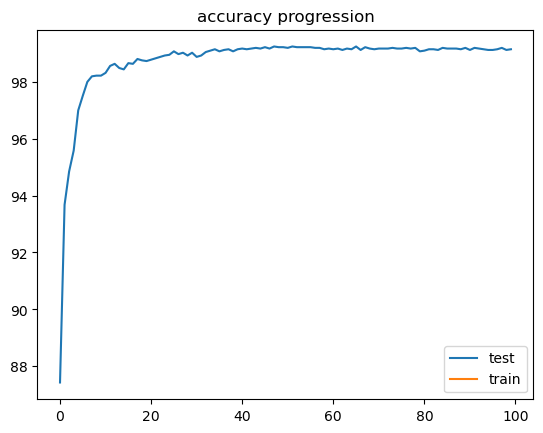

In [69]:
# to do: implement early stopping and callbacks. Other than that, we're done! 
import collections
from time import time
import random
k = 6

seed = settings['seed']
epochs = settings['n_epochs']
experiment_name = settings['experiment_name']
print(experiment_name)
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
p2p = IFCA(total_clients, train_data, train_partition2, val_partition, 
           test_data, test_partition,settings['n_clients_UCB'], 
           settings['alpha'],test)
p2p.loop(epochs, experiment_name, k)

In [60]:
import collections
from time import time
import random

seed = settings['seed']
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
p2p = IFCA(total_clients, train_data, train_partition2, val_partition, test_data, test_partition,settings['n_clients_UCB'], settings['alpha'],test)
k = 6
p2p.init_ifca(k)

for i in range(100):
    p2p.iteration = i
    if i != 0: 
        p2p.cluster_ifca([x for x in range(total_clients)],k)
    p2p.run_ifca([x for x in range(total_clients)])
    p2p.combine_ifca([x for x in range(total_clients)],k)

[5 5 0 4 2 3 2 3 5 4 3 0 3 2 0 0 2 3 2 2 2 0 0 4 0 2 3 3 4 0 0 4 1 4 1 0 0
 4 3 5 0 5 1 5 0 0 0 4 0 2 5 0 2 2 5 1 0 4 2 3 4 2 5 5 3 4 3 1 0 2 5 1 0 5
 2 4 5 2 4 3 3 0 4 4 2 3 3 5 5 4 1 3 3 1 5 1 5 5 1 4]
[ 9.36743184 10.30831967 10.43126519 11.39424943 12.99261433 10.81324634
 10.50401541 15.81702677 16.15454371 11.95235402  9.79667609 10.6300406
 12.99685403 16.57800359 10.40562017 11.49187793 15.87160287 12.23431364
 15.52642678 12.40498564  9.14296638 12.36593808 16.12521356 14.64841787
 13.12785507 16.67487069 15.02156454 16.45007342 11.47486049 16.11168727
 14.8306929  15.59644243 10.99572713  9.42976952 11.75191086 11.7629579
 16.30117113 15.11470363 13.04950721 11.79067681 15.64699407 11.2150761
 10.59756757 15.11531909 10.51486146 10.67298332  9.41387582 10.99372221
 14.94656048  9.73487899 16.36346982 10.50750775  9.86252682 11.92981055
  9.92827041 16.23889069  9.63711866 11.92582198  9.07835158 16.32632176
  9.75000498 13.09659082  9.44123762 10.70802076 16.23021818 12.96326

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[6.99557587e-01 2.07062840e-04 5.21567007e-01 4.89326226e-01
 1.59507793e-01 4.00211374e-02 1.51415532e-01 6.73029167e-01
 8.59738493e-02 6.12378289e-01 6.99178650e-01 1.07668853e-02
 1.50333930e-01 9.98965814e-01 1.44768523e-02 6.81705833e-01
 8.93709595e-01 3.63554025e-01 1.18474856e+00 2.91338149e-01
 1.66921555e-01 1.47669533e+00 1.20101367e-01 1.03224975e+00
 2.65883424e-01 1.03429504e+00 6.07753273e-01 7.94736386e-01
 1.00589428e-01 4.84625689e-01 5.84252516e-01 6.00451627e-01
 2.79842148e-04 3.81517710e-01 5.25975505e-01 9.07686876e-01
 6.71010171e-01 3.81787758e-01 1.74964924e-01 4.94942342e-01
 1.14534715e+00 1.31319152e-03 8.75888924e-04 1.36803793e+00
 5.48098171e-02 9.45778416e-01 3.55299690e-02 4.65943614e-01
 8.09437816e-01 1.14825507e+00 1.07445450e+00 2.61261954e-01
 1.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[5.56324632e-01 1.72889111e-06 6.98964914e-01 4.06386351e-01
 4.46897274e-02 1.04463422e-02 2.12386710e-01 3.96693946e-01
 2.59211569e-02 4.32645806e-01 8.09288211e-01 4.40588751e-04
 2.09826759e-01 9.72431442e-01 1.51294076e-04 6.45485693e-01
 6.27005167e-01 4.87233187e-01 9.47605973e-01 7.86326185e-02
 6.77364370e-01 1.03985909e+00 9.02083550e-02 6.46732870e-01
 2.66369808e-01 8.95654175e-01 3.09085001e-01 5.07408239e-01
 3.09479625e-02 2.26881789e-01 3.82132784e-01 2.90493889e-01
 1.84308259e-05 1.95407301e-01 6.07740847e-01 7.63229252e-01
 3.23325969e-01 1.77487222e-01 5.65607603e-02 2.86748561e-01
 8.59014672e-01 7.92038996e-04 1.76506379e-05 7.98433930e-01
 2.85822176e-02 1.10988195e+00 5.18447942e-02 3.53239911e-01
 4.02385701e-01 1.13240582e+00 7.79958934e-01 1.82219099e-01
 1.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.70994046e-01 6.07009441e-07 9.61754765e-01 3.76154526e-01
 1.59471148e-02 1.52111146e-04 6.76966530e-02 3.00959997e-01
 1.22324617e-02 3.31116317e-01 8.42012863e-01 3.32486797e-05
 4.97627905e-01 8.78406344e-01 1.25084788e-04 6.81232721e-01
 4.59880959e-01 2.15463401e-01 8.50256836e-01 2.20777831e-02
 1.24109213e-01 9.63825256e-01 8.31381892e-02 3.81566370e-01
 2.89583216e-01 8.06104715e-01 1.88241644e-01 4.08011787e-01
 7.20466557e-03 1.46962500e-01 3.62453114e-01 1.73968699e-01
 2.52107817e-06 1.87545672e-01 6.64581667e-01 7.05939588e-01
 2.32621287e-01 1.24011291e-01 2.77056040e-02 2.02489964e-01
 6.35372928e-01 3.63460966e-06 8.06441890e-08 5.62365901e-01
 6.08239981e-04 9.75544713e-01 5.05064310e-03 3.64939587e-01
 2.30302044e-01 1.40867417e+00 6.57795802e-01 6.02112525e-02
 1.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[1.81474483e+00 7.70589092e-08 9.09106633e-01 3.56352836e-01
 4.04557615e-02 1.05172670e-04 6.62788568e-02 3.16537752e-01
 1.63608721e-02 2.78108773e-01 8.89568359e-01 3.55283276e-06
 1.37673285e-01 8.45611436e-01 7.01090281e-06 7.14584854e-01
 3.46053475e-01 2.25146079e-01 8.01642433e-01 7.84423165e-03
 7.20419128e-02 9.46797534e-01 5.56981334e-02 3.07424927e-01
 2.40631821e-01 8.94152419e-01 1.16303021e-01 4.65355035e-01
 2.30377239e-03 1.02890996e-01 3.28241754e-01 1.29256494e-01
 1.72179075e-06 1.81323981e-01 6.91444039e-01 7.18335315e-01
 3.93884897e-01 8.53314816e-02 2.19473019e-02 1.66894716e-01
 7.56626088e-01 3.77680644e-06 1.98029909e-08 5.52091626e-01
 5.60477266e-04 8.79357635e-01 2.52539433e-03 3.82773846e-01
 1.58668838e-01 1.51987432e+00 5.79022912e-01 7.23732185e-02
 1.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.35430052e-01 3.41965713e-08 8.85875762e-01 4.05671649e-01
 1.83111138e-02 7.09038584e-05 5.70356239e-02 5.43799404e-01
 3.99635880e-03 2.58030234e-01 9.23567464e-01 1.22639266e-06
 1.90958801e-01 8.52742309e-01 1.60929105e-06 7.98866029e-01
 3.10824032e-01 2.03157360e-01 7.88561949e-01 4.63317174e-03
 8.52267028e-02 8.48230215e-01 3.09375909e-02 2.44623015e-01
 2.61724052e-01 8.95849547e-01 8.55104157e-02 3.29108760e-01
 1.09284246e-03 8.56639834e-02 3.36483806e-01 1.41832957e-01
 1.48385026e-06 1.31779862e-01 7.80774954e-01 7.26495811e-01
 2.01207006e-01 6.37376307e-02 1.07814053e-02 1.72782093e-01
 4.55465882e-01 2.50282687e-06 7.89962288e-09 4.75557139e-01
 3.61807136e-04 8.13871479e-01 1.35235220e-03 2.97045969e-01
 1.08071297e-01 1.55372306e+00 5.40179519e-01 9.01361983e-03
 1.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.60453723e-01 4.49384268e-08 8.22414932e-01 3.97789449e-01
 5.10226426e-03 1.24995030e-04 7.30780427e-02 2.30606003e-01
 1.68224168e-03 2.36075818e-01 1.01455167e+00 5.20050496e-07
 2.64355850e-01 9.40202425e-01 4.26541417e-07 8.34383441e-01
 3.11290050e-01 2.22892827e-01 7.17357475e-01 3.50240422e-03
 7.10133166e-02 8.58818237e-01 2.36076142e-02 3.34027979e-01
 3.16727129e-01 8.91003811e-01 6.30339412e-02 3.14786516e-01
 6.77690730e-04 5.04510395e-02 3.59618647e-01 7.40585978e-02
 8.77926796e-07 1.59361297e-01 7.86724821e-01 7.15209740e-01
 2.18550268e-01 4.20055721e-02 7.93734082e-03 1.65158980e-01
 4.43548092e-01 2.73665833e-06 7.30967118e-09 4.68120146e-01
 4.94425957e-04 7.67279668e-01 8.08907756e-04 2.79334090e-01
 8.63183453e-02 1.65289149e+00 5.51765168e-01 6.46142307e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[5.03128970e-01 1.95039159e-08 8.83001616e-01 4.35896174e-01
 6.85995631e-03 2.98878477e-05 3.27778149e-02 2.31242742e-01
 1.67515979e-03 2.21986035e-01 1.03067249e+00 4.13240274e-07
 2.32061602e-01 8.24603427e-01 4.44829213e-07 8.89079175e-01
 2.61316776e-01 2.05275106e-01 6.85800376e-01 2.30294541e-03
 7.21646471e-02 7.87683553e-01 2.65412120e-02 1.83489124e-01
 2.84545061e-01 2.03145206e+00 4.64425944e-02 2.88133088e-01
 4.66364088e-04 4.17488129e-02 3.56351606e-01 6.79057563e-02
 1.57581472e-06 1.42033915e-01 8.46249855e-01 7.12144999e-01
 2.03721090e-01 3.23320973e-02 4.56148378e-03 1.75506318e-01
 4.17521742e-01 7.21176180e-07 2.01180686e-09 4.51046064e-01
 1.48371767e-04 7.42595192e-01 5.85697202e-04 2.32907833e-01
 7.56658266e-02 1.70251515e+00 5.41659153e-01 4.29139952e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.31613570e-01 8.47901828e-09 8.14086402e-01 4.53151942e-01
 3.38534319e-03 5.37202310e-05 4.84617669e-02 2.32928476e-01
 1.10888034e-03 2.10759947e-01 1.02562805e+00 2.21171944e-07
 2.72711872e-01 8.64394019e-01 2.24241377e-07 9.18342060e-01
 2.72131010e-01 2.05540318e-01 6.62903505e-01 1.86076855e-03
 5.46711622e-02 8.11266990e-01 1.94896943e-02 1.71359689e-01
 3.10997131e-01 9.45286573e-01 3.68310540e-02 2.78403974e-01
 3.31596487e-04 3.41853338e-02 3.56148758e-01 5.82956857e-02
 8.83068936e-07 1.43451219e-01 8.66299739e-01 7.19650076e-01
 2.03128854e-01 2.47525047e-02 2.97262398e-03 1.79750749e-01
 4.14908860e-01 1.21351118e-06 2.42010589e-09 4.61353738e-01
 2.53892503e-04 6.93656570e-01 2.79570482e-04 2.22011812e-01
 6.30288778e-02 1.74496135e+00 5.48835111e-01 2.84087964e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.28001254e-01 9.01828622e-09 8.31573067e-01 4.69372238e-01
 2.19953401e-03 2.95701834e-05 3.58747031e-02 2.29806692e-01
 6.20531039e-04 2.09169252e-01 1.05645100e+00 1.92928686e-07
 2.90227284e-01 9.65959822e-01 1.94535186e-07 9.54481570e-01
 3.13190867e-01 2.09236423e-01 6.56737160e-01 1.47904442e-03
 5.33833503e-02 8.15530991e-01 1.21268580e-02 1.57986636e-01
 3.07250295e-01 9.43525612e-01 3.19745056e-02 2.64309936e-01
 3.04269346e-04 3.13697292e-02 3.56227480e-01 5.51412821e-02
 1.06658098e-06 1.46490164e-01 8.87446377e-01 7.23011623e-01
 2.28076747e-01 4.00058523e-02 2.37040585e-03 1.83868037e-01
 3.85672098e-01 8.01073485e-07 1.42837770e-09 4.57797101e-01
 1.50349139e-04 6.69591702e-01 2.41593163e-04 2.15982378e-01
 1.21448181e-01 1.78406516e+00 1.24489491e+00 2.09699796e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.23439851e-01 7.23651789e-09 8.16345614e-01 4.58538186e-01
 1.33724502e-03 3.03350439e-05 3.64050510e-02 2.25280456e-01
 6.81883206e-04 2.01017552e-01 1.07565064e+00 1.50862198e-07
 3.13929964e-01 8.80332808e-01 1.72599540e-07 9.55247363e-01
 2.77486435e-01 2.18703291e-01 6.53914119e-01 1.27914213e-03
 5.10025205e-02 8.48250152e-01 1.51326096e-02 1.49619290e-01
 3.23571430e-01 9.55557611e-01 2.90845125e-02 2.58333545e-01
 2.07359880e-04 2.84470162e-02 3.63997908e-01 5.41218210e-02
 9.56528581e-07 1.43431428e-01 8.73601840e-01 7.19099458e-01
 2.14075521e-01 1.89747338e-02 1.98451923e-03 1.77521003e-01
 3.73895021e-01 7.77620993e-07 1.26479078e-09 4.42467110e-01
 1.53576842e-04 6.58786651e-01 1.92044074e-04 2.17460168e-01
 6.20978622e-02 1.81833824e+00 5.37342953e-01 1.73839179e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.15274124e-01 5.75421846e-09 7.96566754e-01 4.87437221e-01
 1.44352389e-03 3.42629281e-05 4.02613065e-02 2.25066143e-01
 4.53778447e-04 1.87220290e-01 1.08147478e+00 1.27644179e-07
 3.00323764e-01 9.49734175e-01 1.79109989e-07 9.87306270e-01
 3.08128768e-01 1.94109022e-01 7.00817489e-01 1.27502186e-03
 3.86354600e-02 1.01766949e+00 1.05765711e-02 1.44567100e-01
 3.03586013e-01 9.65793081e-01 2.66983512e-02 2.50528181e-01
 2.06504469e-04 2.62612588e-02 3.68001810e-01 4.98746170e-02
 8.38119729e-07 1.61445595e-01 9.31059264e-01 7.10373253e-01
 2.31189593e-01 1.69482148e-02 1.80636287e-03 1.88036791e-01
 3.60749886e-01 9.15468085e-07 1.26155331e-09 4.36464951e-01
 1.64308699e-04 6.24069076e-01 1.27168656e-04 1.82552970e-01
 4.66356814e-02 1.85718208e+00 5.35480081e-01 1.45143472e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.14879858e-01 5.96218836e-09 8.02829014e-01 4.74448266e-01
 1.15704261e-03 2.71752371e-05 3.42895536e-02 2.28602510e-01
 3.09953365e-04 1.93847446e-01 1.09546280e+00 1.16339415e-07
 3.66045557e-01 1.00481387e+00 1.62857356e-07 9.85782235e-01
 3.56061306e-01 2.21146619e-01 6.62547514e-01 1.05348659e-03
 4.98626692e-02 8.59769657e-01 8.58169167e-03 2.38701829e-01
 3.42847538e-01 9.68582068e-01 2.68854613e-02 2.42200426e-01
 1.58957700e-04 2.47202481e-02 3.65523947e-01 4.93957427e-02
 9.35344938e-07 1.40458859e-01 8.93526360e-01 7.17809721e-01
 2.58339809e-01 1.52195324e-02 1.63231883e-03 1.83810138e-01
 3.54346392e-01 7.37268284e-07 1.18909880e-09 4.42716194e-01
 1.33389571e-04 6.13428008e-01 1.50800268e-04 2.06922820e-01
 4.40261473e-02 1.86120987e+00 5.35467933e-01 1.26787292e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.06534427e-01 7.82273103e-09 8.18895583e-01 4.73317420e-01
 7.37863747e-04 1.87816156e-05 2.71201338e-02 2.30820613e-01
 3.14436919e-04 1.91006227e-01 1.09984947e+00 1.19386001e-07
 3.37131505e-01 9.85019675e-01 4.14914057e-07 9.86217539e-01
 3.34657060e-01 2.24788732e-01 1.11472299e+00 9.52609190e-04
 4.11545760e-02 8.73840132e-01 9.03217288e-03 1.40914316e-01
 3.16304529e-01 9.67794463e-01 2.35109707e-02 2.41093926e-01
 1.40643717e-04 2.35564628e-02 3.69889279e-01 4.89739143e-02
 1.15268574e-06 1.51061176e-01 8.92126477e-01 7.16387537e-01
 2.50454240e-01 1.58991976e-02 1.44568335e-03 1.81309158e-01
 6.34738491e-01 5.42319531e-07 7.75574686e-10 4.41362080e-01
 9.61581293e-05 6.06048150e-01 1.60421631e-04 2.11515940e-01
 4.27113929e-02 1.88339507e+00 5.35012346e-01 1.16749317e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.01582766e-01 7.58161800e-09 8.07872603e-01 4.77401362e-01
 7.83589766e-04 2.13419260e-05 3.01337564e-02 2.41664715e-01
 3.06535712e-04 1.84750365e-01 1.09417089e+00 1.05508559e-07
 3.30355887e-01 9.74449950e-01 1.47114833e-07 9.92777650e-01
 3.35273765e-01 2.16864674e-01 6.25969511e-01 9.49599682e-04
 3.41426148e-02 8.74122662e-01 9.31765379e-03 1.51046028e-01
 3.07479471e-01 9.74444180e-01 2.12132144e-02 2.44166775e-01
 2.50849815e-04 2.15440996e-02 3.62849558e-01 4.35679322e-02
 9.93122020e-07 1.61097158e-01 9.03268690e-01 7.09740826e-01
 2.45891585e-01 1.25373118e-02 1.36981284e-03 1.81333793e-01
 3.63456465e-01 5.95837843e-07 7.90306887e-10 4.70470096e-01
 4.22736540e-04 5.98601469e-01 8.95205395e-05 2.01610610e-01
 4.41700207e-02 1.89641337e+00 5.52125278e-01 1.06998859e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[4.01484651e-01 5.93205267e-09 8.08899114e-01 4.81324903e-01
 6.67701000e-04 1.96064417e-05 2.84060080e-02 2.37367985e-01
 3.28617688e-04 1.83120387e-01 1.09824031e+00 1.02102948e-07
 3.41159990e-01 9.43472991e-01 1.43283863e-07 9.98894335e-01
 3.09090587e-01 2.14781477e-01 6.79842850e-01 8.91811653e-04
 2.81032508e-02 8.38863740e-01 1.04571622e-02 1.41406212e-01
 3.14804402e-01 9.78764389e-01 2.10219315e-02 2.41213830e-01
 1.34673069e-04 2.12950685e-02 3.71244540e-01 4.59729809e-02
 3.82780130e-06 1.75523101e-01 9.12490079e-01 7.07089919e-01
 2.37968722e-01 1.27420066e-02 1.29063960e-03 1.82536677e-01
 3.45304436e-01 5.56622376e-07 9.24549851e-10 4.52856253e-01
 9.80019305e-05 5.92627529e-01 7.15654311e-05 1.96878071e-01
 4.04011275e-02 1.91669278e+00 5.44981567e-01 1.01071145e-03
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[3.99433645e-01 6.22144684e-09 8.14221876e-01 4.78264637e-01
 6.64164452e-04 1.72103416e-05 2.62107394e-02 2.43481775e-01
 3.26236473e-04 1.81175845e-01 1.11136994e+00 1.02418134e-07
 3.38804179e-01 9.38857643e-01 1.36438388e-07 9.98664877e-01
 3.05593648e-01 2.16018631e-01 6.20050448e-01 8.66230468e-04
 3.56490338e-02 8.39018083e-01 1.06689487e-02 1.49067538e-01
 3.09858204e-01 9.82796219e-01 2.17201881e-02 2.41210398e-01
 1.59349864e-04 2.04593108e-02 3.63777040e-01 4.28180058e-02
 1.10770782e-06 1.59855347e-01 9.10213788e-01 7.03179554e-01
 2.37054430e-01 1.16372757e-02 1.25088968e-03 1.81411477e-01
 3.59047498e-01 4.91738113e-07 6.70151252e-10 4.74947510e-01
 8.71212989e-05 5.90124467e-01 9.17348761e-05 1.98090834e-01
 4.24193229e-02 1.91238774e+00 5.55838039e-01 9.88214767e-04
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[3.99890319e-01 6.63123362e-09 8.09003793e-01 4.87339167e-01
 6.54361059e-04 1.80908608e-05 2.69671193e-02 2.47274954e-01
 2.94177866e-04 1.75301551e-01 1.11921734e+00 9.73262706e-08
 3.38203314e-01 9.56644437e-01 1.38677065e-07 1.00695415e+00
 3.15900404e-01 2.06421325e-01 6.15246731e-01 8.85144012e-04
 4.09833683e-02 8.03797791e-01 5.19526775e-02 1.53642872e-01
 3.08867317e-01 9.84291536e-01 1.95297094e-02 2.41047854e-01
 1.31413752e-04 2.04620860e-02 3.62258746e-01 4.08845245e-02
 1.06000422e-06 1.49139418e-01 9.28562730e-01 6.99525262e-01
 2.43058289e-01 1.10860846e-02 1.21302455e-03 1.85018414e-01
 4.83852743e-01 5.08408212e-07 6.69875653e-10 4.82211309e-01
 8.99795343e-05 5.85582847e-01 1.05697777e-04 1.83228009e-01
 4.27844277e-02 1.90762930e+00 5.61576012e-01 9.47065503e-04
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[3.99859112e-01 5.32501205e-09 8.00648921e-01 4.94224468e-01
 6.49985829e-04 2.01093250e-05 2.90269216e-02 2.45516146e-01
 3.10464046e-04 1.72644977e-01 1.12303269e+00 9.17847482e-08
 3.36912787e-01 9.40864898e-01 1.45613031e-07 1.01250864e+00
 3.05810558e-01 2.00971872e-01 6.33306702e-01 8.83370772e-04
 4.25315653e-02 7.85449100e-01 1.05036455e-02 1.58530169e-01
 3.05834322e-01 9.88294780e-01 2.04886434e-02 2.38862099e-01
 1.31553185e-04 1.97648568e-02 3.63311995e-01 4.16514055e-02
 9.73266343e-07 1.45415337e-01 9.40327038e-01 6.98705106e-01
 2.37382452e-01 1.11117711e-02 1.19152388e-03 1.87267686e-01
 3.59516488e-01 5.60386494e-07 6.97765233e-10 4.76167251e-01
 9.80644153e-05 5.80611304e-01 1.07803255e-04 1.76382012e-01
 4.15355525e-02 1.90906537e+00 5.77257928e-01 9.07240167e-04
 2.

[2 1 1 0 3 1 1 4 5 0 2 1 3 5 1 0 5 0 4 0 2 0 5 4 3 5 4 4 0 4 4 4 1 2 0 0 5
 4 3 0 4 1 1 4 1 1 2 0 4 2 4 1 2 0 1 4 2 0 2 5 2 3 2 1 5 3 1 1 0 5 0 5 1 4
 2 4 2 2 3 1 0 3 5 4 2 3 1 3 5 0 4 2 3 1 4 3 5 1 5 1]
[3.98709809e-01 5.31440659e-09 8.00429458e-01 1.12794677e+00
 6.70372223e-04 1.97041527e-05 2.86028001e-02 2.46551895e-01
 3.23564453e-04 1.72915177e-01 1.12475461e+00 9.07333030e-08
 3.33046270e-01 9.28031955e-01 1.44848811e-07 2.31695617e+00
 2.98414230e-01 2.01908101e-01 6.17381043e-01 9.01454375e-04
 4.17320812e-02 7.89743396e-01 1.09862807e-02 1.49901391e-01
 3.02465532e-01 9.91315880e-01 1.87546332e-02 2.39907978e-01
 1.26787634e-04 1.94042899e-02 3.66879681e-01 4.19643179e-02
 9.80878042e-07 1.45854241e-01 9.40793760e-01 6.99117570e-01
 2.33376492e-01 1.07872637e-02 1.24251586e-03 1.87019278e-01
 3.60085485e-01 5.48627522e-07 8.79535068e-10 4.78137784e-01
 9.61665641e-05 5.78556477e-01 1.04608725e-04 1.77901224e-01
 4.11938928e-02 1.91231396e+00 5.58810387e-01 8.91065895e-04
 1.

In [61]:
p2p.selected_clients = [x for x in range(total_clients)]
p2p.calc_accuracy(p2p.dataloaders_really_test, p2p.len_really_test)

99.51183793019283

In [4]:
class P2P_AFPL():
    def __init__(self ,total_clients ,train_data ,train_partition ,val_partition ,test_data ,test_partition,n_clients_selected
                 ,alpha = 0.25, test='AFPL'):
        self.network = Net('MNIST_niid')
        self.total_clients = total_clients
        self.client_models = {}
        self.optimizers = {}
        self.dataloaders = {}
        self.len = {}
        self.len_test = {}
        self.len_really_test = {}
        self.dataloaders_test = {}
        self.dataloaders_really_test = {}
        self.best_test_loss = {}
        self.best_test_loss_global = 1000000
        self.current_test_loss = {}
        self.current_train_loss = {}
        self.test = test
        if self.test == 'AFPL':
            self.client_models_global = {}
            self.alpha = alpha

        if self.test == 'bandits':
            self.comb_UCB = combinatorial_UCB(self.total_clients,n_clients_selected)

        for i in range(total_clients):
            self.client_models[str(i)] = copy.deepcopy(self.network).double().cuda()
            self.optimizers[str(i)] = torch.optim.SGD(self.client_models[str(i)].parameters() ,lr=0.008 ,momentum=0.5)
            if data_fraction != 1:
                dataset_train= MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,train_partition ,i)
            else:
                dataset_train = MNIST_NIID_dataset(train_data[0], train_data[1], train_partition, i)

            if i == 1:
                if data_fraction != 1:
                    dataset = torch.utils.data.ConcatDataset([dataset_train,MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,train_partition,i )])
                else:
                    dataset = torch.utils.data.ConcatDataset(
                        [dataset_train, MNIST_NIID_dataset(train_data[0], train_data[1], train_partition, i)])
            if i > 1 :
                if data_fraction != 1:
                    dataset = torch.utils.data.ConcatDataset(
                    [dataset,MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,train_partition,i )])
                else:
                    dataset = torch.utils.data.ConcatDataset(
                        [dataset, MNIST_NIID_dataset(train_data[0], train_data[1], train_partition, i)])


            self.len[str(i) ]= len(dataset_train)
            self.dataloaders[str(i)] = DataLoader(dataset_train ,batch_size=16 ,shuffle=True)
            if data_fraction !=1:
                dataset_test= MNIST_NIID_dataset(train_data[0][blub] ,train_data[1][blub] ,val_partition,i  )
            else:
                dataset_test = MNIST_NIID_dataset(train_data[0], train_data[1], val_partition, i)

            dataset_really_test = MNIST_NIID_dataset(test_data[0],test_data[1],test_partition,i)
            self.len_really_test[str(i)] = len(dataset_really_test)
            self.dataloaders_really_test[str(i)] = DataLoader(dataset_really_test,batch_size=16,shuffle=True)
            self.len_test[str(i)] = len(dataset_test)
            self.dataloaders_test[str(i)] = DataLoader(dataset_test ,batch_size=16 ,shuffle=False)
            self.best_test_loss[str(i)] = 10000000
            self.current_test_loss[str(i)] = 100000
            self.current_train_loss[str(i)] = 1000000
            if self.test == 'AFPL':
                self.client_models_global[str(i)] = copy.deepcopy(self.network).double().cuda()
                self.shared_model = copy.deepcopy(self.network).double().cuda()
        self.dataset_train = dataset_train
        self.dataloader_centralized = DataLoader(dataset, batch_size=32, shuffle=True)

    def update_local_models(self ,selected_clients):
        self.dw = {}
        loss_test = 0
        loss_test2 = 0
        losses = 0
        losses2 = 0
        loss_test3 = 0
        losses3 = 0

        for idx ,i in enumerate(selected_clients):

            dataloader = self.dataloaders[str(i)]
            optimizer= torch.optim.Adam(self.client_models[str(i)].parameters() ,lr=0.001 *0.95**self.iteration)
            self.client_models[str(i)].train()

            if self.test == 'AFPL':
                self.client_models_global[str(i)] = copy.deepcopy(self.shared_model)
                self.client_models_global[str(i)].train()
                optimizer_global = torch.optim.Adam(self.client_models_global[str(i)].parameters()
                                                    ,lr=0.001 *0.95**self.iteration)

            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.double().cuda()
                target =target.long().cuda()

                optimizer.zero_grad()
                output = self.client_models[str(i)](data)
                loss = F.nll_loss(output ,target)

                if self.test == 'AFPL':
                    optimizer_global.zero_grad()
                    output_global= self.client_models_global[str(i)](data)
                    loss_global = F.nll_loss(output_global ,target)
                    loss_global.backward()
                    optimizer_global.step()

                loss.backward()
                optimizer.step()

            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target =target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test += F.nll_loss(output ,target)
                self.current_test_loss[str(i)] = loss_test /self.len_test[str(i)]
                if self.current_test_loss[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model ' +str(i ) +'.pt'))
                    self.best_test_loss[str(i)] = self.current_test_loss[str(i)]

            losses += loss_test /self.len_test[str(i)]
            loss_test2 = 0
            self.client_models[str(i)].eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader):
                    data = data.double().cuda()
                    target = target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test2 += F.nll_loss(output, target)

            losses2 += loss_test2 / self.len[str(i)]
            self.current_train_loss[str(i)] = loss_test2 / self.len[str(i)]

        print('full train loss: ', losses2)
        print('full loss: ', losses)

        return losses2, losses

    def centralized(self ,selected_clients):
        self.dw = {}
        loss_test = 0
        loss_test2 = 0
        losses = 0
        losses2 = 0
        loss_test3 = 0
        losses3 = 0

        dataloader = self.dataloader_centralized
        optimizer= torch.optim.Adam(self.client_models[str(0)].parameters() ,lr=0.001 *0.95**self.iteration)
        self.client_models[str(0)].train()


        for batch_idx, (data, target) in enumerate(dataloader):
            data = data.double().cuda()
            target =target.long().cuda()

            optimizer.zero_grad()
            output = self.client_models[str(0)](data)
            loss = F.nll_loss(output ,target)

            loss.backward()
            optimizer.step()

        self.client_models[str(0)].eval()
        for idx, i in enumerate(selected_clients):
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target =target.long().cuda()

                    output = self.client_models[str(0)](data)
                    loss_test += F.nll_loss(output ,target)

                losses += loss_test / self.len_test[str(i)]
        self.current_test_loss[str(0)] = loss_test /self.len_test[str(0)]
        if self.current_test_loss[str(0)] < self.best_test_loss[str(0)]:
            torch.save(self.client_models[str(0)].state_dict(), os.path.join(save_dir, 'model', 'best_model ' +str(0 ) +'.pt'))
            self.best_test_loss[str(0)] = self.current_test_loss[str(0)]


        loss_test2 = 0
        self.client_models[str(0)].eval()
        for idx, i in enumerate(selected_clients):
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(self.dataloaders[str(i)]):
                    data = data.double().cuda()
                    target = target.long().cuda()

                    output = self.client_models[str(0)](data)
                    loss_test2 += F.nll_loss(output, target)

                losses2 += loss_test2 / self.len[str(i)]
        self.current_train_loss[str(i)] = loss_test2 / self.len[str(i)]

        print('full train loss: ', losses2)
        print('full loss: ', losses)
        for idx, i in enumerate(selected_clients):
            if i != 0:
                for (name, param), (name2, param2) in zip(self.client_models[str(i)].named_parameters(),
                                                          self.client_models[str(0)].named_parameters()):
                    param.data = param2.data
                self.client_models[str(i)].double()

        return losses2, losses

    def combine_models(self, i, client_numbers, set_as=True):
        zero_copy = copy.deepcopy(self.client_models[str(i)])  # This is used to collect the model in
        j = 0
        client_numbers_plus_client = np.concatenate((client_numbers, np.array([int(i)])))  # This is more efficient
        #  alphas = zero_copy.alphas.detach()
        # alphas[i] = 1 - torch.sum(
        #     torch.tensor([iii for idx, iii in enumerate(alphas) if idx != i and idx in client_numbers]))
        # It's not possible to set the value of self.alphas[i], so instead we determine it manually here
        alphas = torch.ones(len(client_numbers_plus_client)).cuda() / (len(client_numbers_plus_client))
        # print(alphas)
        for ii in client_numbers_plus_client:
            #  print(ii)
            for (name, param), (name2, param2) in zip(zero_copy.named_parameters(), self.client_models[
                str(ii)].named_parameters()):  # self.client_models[str(ii)].named_parameters()):

                if name != 'alphas':
                    if j == 0:
                        param.data = torch.zeros(param.shape).cuda()

                    param.data += alphas[j] * param2.data  # we add all participating client's models to the one here.

            j += 1

        # self.client_models[str(i)] = zero_copy.double()
        if set_as == True:
            for (name, param), (name2, param2) in zip(self.client_models[str(i)].named_parameters(),
                                                      zero_copy.named_parameters()):
                param.data = param2.data
            self.client_models[str(i)].double()
        else:
            return zero_copy.double()

    def federated_averaging(self):
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)

        losses = 0
        losses2 = 0
        # print("weights ",weight)
        for idx, i in enumerate(self.selected_clients):
            for (name, param), (name2, param2) in zip(self.shared_model.named_parameters()
                    , self.client_models[str(i)].named_parameters()):
                if idx == 0:
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx] * param2.data

        self.shared_model = self.shared_model.double().eval()

        for i in self.selected_clients:
            self.client_models[str(i)] = copy.deepcopy(self.shared_model)  # copy global model to the clients
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.shared_model(data), target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                torch.save(self.client_models[str(i)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(i)] = loss_test
            self.client_models[str(i)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.shared_model(data), target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(i)]
            losses2 += loss_test2

        return losses, losses2

    def federated_averaging2(self):
        # Accumulate global model
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)

        losses = 0
        losses2 = 0
        # print("weights ",weight)
        for idx, i in enumerate(self.selected_clients):
            for (name, param), (name2, param2) in zip(self.shared_model.named_parameters()
                    , self.client_models[str(i)].named_parameters()):
                if idx == 0:
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx] * param2.data

        self.shared_model = self.shared_model.double().eval()

        # loop over clients
        for i in self.selected_clients:
            # check if model improves performance
            #self.client_models[str(i)] = copy.deepcopy(self.shared_model)  # copy global model to the clients
            self.client_models[str(i)].eval().cuda()
            loss_test = 0
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.shared_model(data), target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(self.client_models[str(i)](data), target).detach().cpu().numpy()

            ey = loss_test / self.len_test[str(i)]
            current_test = loss_test2 / self.len_test[str(i)]
            if ey < current_test:
               # print('replaced local model with global')
                self.client_models[str(i)] = copy.deepcopy(self.shared_model)
                losses += ey
                if ey < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(),
                               os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                    self.best_test_loss[str(i)] = ey
            else:
              #  print('nothing')
                losses += current_test
                if current_test < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(),
                               os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                    self.best_test_loss[str(i)] = current_test


            self.client_models[str(i)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(i)](data), target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(i)]
        losses2 += loss_test2
        return losses, losses2

    def AFPL(self):  # use alpha = 0.25 = 0.75 global model + 0.25 local model
        self.shared_model_old = copy.deepcopy(self.shared_model)
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)

        losses = 0
        losses2 = 0

        # accumulate local weights
        for idx, i in enumerate(self.selected_clients):
            for (name, param), (name2, param2), (name3, param3), (name4, param4) in zip(
                    self.shared_model.named_parameters()
                    , self.client_models_global[str(i)].named_parameters(),
                    self.shared_model_old.named_parameters(),
                    self.client_models[str(i)].named_parameters()):
                if idx == 0:
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx] * param2.data  # accumulate local weights
                param4.data = self.alpha * param4.data + (1-self.alpha) * param3.data  # do AFPL local model update: note that we take the previous global model
            self.client_models[str(i)] = self.client_models[str(i)].double()
            self.client_models[str(i)].eval()
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(i)](data), target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                torch.save(self.client_models[str(i)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(i)] = loss_test
            self.client_models[str(i)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(i)](data), target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(i)]
            losses2 += loss_test2

        self.shared_model = self.shared_model.double()
        return losses, losses2

    def optimal_fedavg(self):
        losses = 0
        losses2 = 0
        for i in range(self.total_clients):

            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0
            loss_test2 = 0
            # print(np.where(adj_matrix[i,:]>0)[0])
            label_informed_selected_clients = np.where(adj_matrix[i, :] > 0)[0]

            label_informed_shared_model = self.combine_models(i, label_informed_selected_clients, set_as=False)
            label_informed_shared_model.eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target = target.long().cuda()

                    output2 = label_informed_shared_model(data)

                    loss_test += F.nll_loss(output2, target)
                if loss_test / self.len_test[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(),
                               os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                    self.best_test_loss[str(i)] = loss_test / self.len_test[str(i)]
            losses += loss_test / self.len_test[str(i)]

            dataloader_test = self.dataloaders[str(i)]
            loss_test2 = 0
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target = target.long().cuda()

                    output = label_informed_shared_model(data)
                    loss_test2 += F.nll_loss(output, target)
            losses2 += loss_test2 / self.len[str(i)]

            self.combine_models(i, label_informed_selected_clients)
        return losses, losses2

    def my_method(self, client):

        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x is not client]
        ey = np.zeros(len(other_clients))  # fix indices
        current_test = np.zeros(len(other_clients))
        collected_clients = []
        list1 = np.arange(len(other_clients))
        np.random.shuffle(list1)
        for i in list1:
            # selected_clients_coalition = other_clients[i] +[client]
            shared_model = self.combine_models(client, [other_clients[i]], set_as=False)

            if len(collected_clients) > 0:
                all_clients = collected_clients + [other_clients[i]]
                shared_model2 = self.combine_models(client, all_clients, set_as=False)

            # print(selected_clients_coalition)
            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0
            loss_test3 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(shared_model(data), target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

                if len(collected_clients) > 0:
                    loss_test3 += F.nll_loss(shared_model2(data), target).detach().cpu().numpy()

            ey[i] = loss_test / self.len_test[str(client)]
            current_test[i] = loss_test2 / self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients) > 0:
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(other_clients[i])
                else:
                    collected_clients.append(other_clients[i])
        loss_test = current_test[i]

        selected_clients = np.where(ey <= self.current_test_loss[str(client)].detach().cpu().numpy())[0]
        selected_clients = [other_clients[x] for x in selected_clients]
        selected_clients = collected_clients

        if len(selected_clients) > 0:
            # self.client_models[str(client)] = copy.deepcopy(shared_model)
            self.combine_models(client, selected_clients, set_as=True)
            # self.client_models[str(client)].double().eval().cuda()
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                torch.save(self.client_models[str(client)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(client)] = loss_test
            self.client_models[str(client)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(client)]

        #    print('test loss: ',loss_test)
        # return ey, selected_clients
        return loss_test, loss_test2, selected_clients

    def calc_accuracy(self, dataloader, length):
        accuracies = np.zeros(len(self.selected_clients))
        total = 0
        self.accuracy_list = []
        for i in self.selected_clients:
            intermediate_accuracy = 0

            for batch_idx, (data, target) in enumerate(dataloader[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array, axis=-1)
                target_array = target.detach().cpu().numpy()
                intermediate_accuracy += np.sum(output_class == target_array)
            accuracy = intermediate_accuracy / length[str(i)]* 100
            total += length[str(i)]

            self.accuracy_list.append(accuracy)
            accuracies[i] = intermediate_accuracy
        overall_accuracy = np.sum(accuracies) / total * 100
        return overall_accuracy

    def my_method2(self, client, k=10):

        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x is not client]
        ey = np.zeros(len(other_clients))  # fix indices
        current_test = np.zeros(len(other_clients))
        collected_clients = []
        list1 = np.arange(len(other_clients))
        np.random.shuffle(list1)
        for i in list1[:k]:
            shared_model = self.combine_models(client, [other_clients[i]], set_as=False)

            if len(collected_clients) > 0:
                all_clients = collected_clients + [other_clients[i]]
                shared_model2 = self.combine_models(client, all_clients, set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0
            loss_test3 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(shared_model(data), target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

                if len(collected_clients) > 0:
                    loss_test3 += F.nll_loss(shared_model2(data), target).detach().cpu().numpy()

            ey[i] = loss_test / self.len_test[str(client)]
            current_test[i] = loss_test2 / self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients) > 0:
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(other_clients[i])
                else:
                    collected_clients.append(other_clients[i])
        loss_test = current_test[i]

        selected_clients = np.where(ey <= self.current_test_loss[str(client)].detach().cpu().numpy())[0]
        selected_clients = [other_clients[x] for x in selected_clients]
        selected_clients = collected_clients

        if len(selected_clients) > 0:
            self.combine_models(client, selected_clients, set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                torch.save(self.client_models[str(client)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(client)] = loss_test
            self.client_models[str(client)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(client)]
        return loss_test, loss_test2, selected_clients

    def bandits(self, client, n):

        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x != client]
        # print(other_clients)
        ey = np.zeros(self.total_clients)  # fix indices
        current_test = np.zeros(self.total_clients)
        collected_clients = []

        selected_clients_UCB = self.comb_UCB.to_client([client], n)
        if client == 1:
            print('selected clients UCB: ', selected_clients_UCB)
        for i in selected_clients_UCB:
            shared_model = self.combine_models(client, [i], set_as=False)

            if len(collected_clients) > 0:
                all_clients = collected_clients + [i]
                shared_model2 = self.combine_models(client, all_clients, set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0
            loss_test3 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(shared_model(data), target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

                if len(collected_clients) > 0:
                    loss_test3 += F.nll_loss(shared_model2(data), target).detach().cpu().numpy()

            ey[i] = loss_test / self.len_test[str(client)]
            current_test[i] = loss_test2 / self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients) > 0:
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(i)
                else:
                    collected_clients.append(i)
        loss_test = current_test[i]
        selected_clients = np.where(ey <= self.current_test_loss[str(client)].detach().cpu().numpy())[0]
        # selected_clients = [other_clients[x] for x in selected_clients]

        selected_clients = collected_clients

        observation = np.zeros(self.total_clients)
        observation[selected_clients] = 1
        if client == 1:
            print(observation)

        self.comb_UCB.to_server(client, observation)

        if len(selected_clients) > 0:
            self.combine_models(client, selected_clients, set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

            loss_test = loss_test / self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                torch.save(self.client_models[str(client)].state_dict(),
                           os.path.join(save_dir, 'model', 'best_model' + str(i) + '.pt'))
                self.best_test_loss[str(client)] = loss_test
            self.client_models[str(client)].eval()
            loss_test2 = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(client)](data), target).detach().cpu().numpy()

            loss_test2 = loss_test2 / self.len[str(client)]
        return loss_test, loss_test2, selected_clients, selected_clients_UCB

    def loop(self, epochs, p2p, experiment_name):

        loss_tests = []
        loss_trains = []
        loss_tests2 = []
        loss_trains2 = []
        accuracies = []
        accuracies_train = []
        best_accuracy = 0
        self.p2p = p2p
        self.phis = np.zeros((self.total_clients, self.total_clients))
        self.phisUCB = np.zeros((self.total_clients, self.total_clients))
        self.selected_clients_arr = np.zeros((epochs, self.total_clients, self.total_clients))

        for i in range(epochs):
            print(i)
            self.iteration = i
            list1 = []
            self.selected_clients = [x for x in range(self.total_clients)]

            if self.test != 'centralized':
                loss_train, loss_test = self.update_local_models(self.selected_clients)
            else:
                loss_train, loss_test = self.centralized(self.selected_clients)
            loss_tests.append(loss_test.detach().cpu().numpy())
            loss_trains.append(loss_train.detach().cpu().numpy())

            if self.test == 'AFPL':
                losses2, losses3 = self.AFPL()

            if self.test == 'prtfl':
                losses2, losses3 = self.federated_averaging2()

            if self.test == 'local':
                print('we are done')

            if self.test == 'federated':
                losses2, losses3 = self.federated_averaging()

            if self.test == 'bandits':
                losses2 = 0
                losses3 = 0
                for client in range(self.total_clients):
                    loss_test2, loss_train2, selected_clients2, selected_clients_UCB= self.bandits(client, i)
                    losses2 += loss_test2
                    if len(selected_clients2) < 1:
                        losses3 += self.current_train_loss[str(client)].detach().cpu().numpy()
                    else:
                        losses3 += loss_train2
                    self.phis[client, selected_clients2] += 1
                    self.selected_clients_arr[i, client, selected_clients2] += 1
                    self.phisUCB[client, selected_clients_UCB] += 1
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi' + str(i) + '.txt')
                np.savetxt(fname, self.phis)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi_UCB' + str(i) + '.txt')
                np.savetxt(fname, self.phisUCB)

            if self.test == 'mine':
                losses2 = 0
                losses3 = 0
                for client in range(self.total_clients):
                    loss_test2, loss_train2, selected_clients2 = self.my_method2(client)
                    losses2 += loss_test2
                    if len(selected_clients2) < 1:
                        losses3 += self.current_train_loss[str(client)].detach().cpu().numpy()

                    else:
                        losses3 += loss_train2
                    self.phis[client, selected_clients2] += 1
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi' + str(i) + '.txt')
                np.savetxt(fname, self.phis)

            if self.test == 'optimal':
                losses2, losses3 = self.optimal_fedavg()
                losses2 = losses2.detach().cpu().numpy()
                losses3 = losses3.detach().cpu().numpy()

            if self.test != 'local' and self.test != 'centralized':
                print('loss after my code: ', losses2)
                print('train loss after my code: ', losses3)
                loss_tests2.append(losses2)
                loss_trains2.append(losses3)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname, loss_tests2)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname, loss_trains2)


            else:
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname, loss_tests)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname, loss_trains)

            accuracy_val = self.calc_accuracy(self.dataloaders_test, self.len_test)
            print('val accuracy: ', accuracy_val)

            accuracy = self.calc_accuracy(self.dataloaders_really_test, self.len_really_test)
            print('test accuracy: ', accuracy)
            accuracies.append(accuracy)
            if accuracy_val > best_accuracy:
                print(best_accuracy)
                print('accuracy is best accuracy')
                print(self.accuracy_list)
                best_accuracy = accuracy_val

                # save all of this in a .txt file
                fname = os.path.join('checkpoints_bandits', experiment_name, 'test_accuracies.txt')
                np.savetxt(fname, self.accuracy_list)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'test_accuracy.txt')
                np.savetxt(fname, [accuracy])
            # accuracy_train = self.calc_accuracy(test=False)
            # print(accuracy_train)
            # accuracies_train.append(accuracy_train)
            # print(self.phis)

        # print(self.phis)
        fname = os.path.join('checkpoints_bandits', experiment_name, 'accuracies.txt')
        np.savetxt(fname, accuracies)

        plt.figure()
        plt.plot(loss_trains, label='train loss before')
        plt.plot(loss_tests, label='test loss before')
        plt.plot(loss_trains2, label='train loss after')
        plt.plot(loss_tests2, label='test loss after')
        plt.title('loss curve')
        plt.legend(loc="upper right")
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'loss_curve.png'))
        plt.clf()
        plt.plot(accuracies, label='test')
        plt.plot(accuracies_train, label='train')
        plt.title('accuracy progression')
        plt.legend()
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'accuracy_progression.png'))



